In [252]:
import pandas as pd
import nltk
import spacy
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
inpath = "output_0211_name_standardized.csv"
df = pd.read_csv(inpath) #.iloc[0:50]

Calculate number of characters and number of words in the body.
Note that there are spelling errors, and words separated by blank spaces that should not be there.
Threads have been removed, but not attachments, although emails with attachments are flagged. Therefore, we could also 
compute statistics just for the emails without attachments, to get more realistic stats. 

In [101]:
bodies = df.Body
bodies[0]

"['Response.pdf', 'Brooks, attached is our response to RFIs 008, 042, 043, and 044.', 'Shane A. Moniz, AIA', 'Architect', 'Conn & Associates, Inc., Architects', '1960-C Buford Boulevard', 'Tallahassee, Florida 32308', 'p 850-878-8784', 'm 850-445-4056', 'smoniz@connandassociates.com', 'NUMBER:', 'REQUEST FOR INFORMATION 003', 'Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park', 'REFERENCE Project 0500', 'To: Shane Moniz']"

In [102]:
df.shape[0]

71143

In [103]:
list(bodies)[0]

"['Response.pdf', 'Brooks, attached is our response to RFIs 008, 042, 043, and 044.', 'Shane A. Moniz, AIA', 'Architect', 'Conn & Associates, Inc., Architects', '1960-C Buford Boulevard', 'Tallahassee, Florida 32308', 'p 850-878-8784', 'm 850-445-4056', 'smoniz@connandassociates.com', 'NUMBER:', 'REQUEST FOR INFORMATION 003', 'Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park', 'REFERENCE Project 0500', 'To: Shane Moniz']"

In [104]:
eval(bodies[0])

['Response.pdf',
 'Brooks, attached is our response to RFIs 008, 042, 043, and 044.',
 'Shane A. Moniz, AIA',
 'Architect',
 'Conn & Associates, Inc., Architects',
 '1960-C Buford Boulevard',
 'Tallahassee, Florida 32308',
 'p 850-878-8784',
 'm 850-445-4056',
 'smoniz@connandassociates.com',
 'NUMBER:',
 'REQUEST FOR INFORMATION 003',
 'Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park',
 'REFERENCE Project 0500',
 'To: Shane Moniz']

In [105]:
nb_words = []
nb_chars = []
body_len = []
body_list = []

# print("bodies columns: ", bodies.columns)
for i, row in enumerate(bodies):
    body = eval(row)
    body = " ".join(body)
    words = body.split(" ")
    text = "".join(words)
    if i < 3: 
        #print("-> row: ", row)
        # print("-> body: ", body)
        print("-> row.Body: ", df.iloc[i].Body)
        print("-> type(body): ", type(body))
    body_list.append(body)
    # print("len(body_list): ", len(body), len(body_list))
    body_len.append(len(body))
    nb_words.append(len(words))
    nb_chars.append(len(text))
len(body_list), len(body_len), len(nb_words), len(nb_chars)

-> row.Body:  ['Response.pdf', 'Brooks, attached is our response to RFIs 008, 042, 043, and 044.', 'Shane A. Moniz, AIA', 'Architect', 'Conn & Associates, Inc., Architects', '1960-C Buford Boulevard', 'Tallahassee, Florida 32308', 'p 850-878-8784', 'm 850-445-4056', 'smoniz@connandassociates.com', 'NUMBER:', 'REQUEST FOR INFORMATION 003', 'Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park', 'REFERENCE Project 0500', 'To: Shane Moniz']
-> type(body):  <class 'str'>
-> row.Body:  ['Good by me!']
-> type(body):  <class 'str'>
-> row.Body:  ['Kim,', 'See comments in blue regarding the proposed upcoming schedule. Ive copied in the City to see if Ive', 'missed anything.', 'June 6  Summary report of Public Forum Input; Existing Conditions Report Card presentation', ' June 10-11  Visioning Forums', ' June 28  deadline for online input and MIAB', ' Week of July 8th  Presentation of Synthesis (Community Aspirations and Issues) and draft Vision', 'Statement, Final Existing Condition

(71143, 71143, 71143, 71143)

In [106]:
body[0]

'C'

In [107]:
body_list[0]

'Response.pdf Brooks, attached is our response to RFIs 008, 042, 043, and 044. Shane A. Moniz, AIA Architect Conn & Associates, Inc., Architects 1960-C Buford Boulevard Tallahassee, Florida 32308 p 850-878-8784 m 850-445-4056 smoniz@connandassociates.com NUMBER: REQUEST FOR INFORMATION 003 Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park REFERENCE Project 0500 To: Shane Moniz'

In [108]:
df1 = df.copy()
df1['nb_words'] = nb_words
df1['nb_chars'] = nb_chars
df1['body_len'] = body_len
df1['body'] = body_list  # leaving original Body column

In [109]:
df1[["body", "Body", "body_len"]]

,body,Body,body_len
0,"Response.pdf Brooks, attached is our response ...","['Response.pdf', 'Brooks, attached is our resp...",392
1,Good by me!,['Good by me!'],11
2,"Kim, See comments in blue regarding the propos...","['Kim,', 'See comments in blue regarding the p...",2328
3,"Hi Alison, Dont apologize, I know its a lot to...","['Hi Alison,', 'Dont apologize, I know its a l...",1723
4,Highly recommend you take a moment out of your...,['Highly recommend you take a moment out of yo...,670
...,...,...,...
71138,"nancy.miller@talgov.com, scoS.maddox@talgov.co...","['nancy.miller@talgov.com, scoS.maddox@talgov....",1398
71139,"All, We are s-ll working on some logis-cal iss...","['All,', 'We are s-ll working on some logis-ca...",528
71140,Current Call sheet attached - including this g...,['Current Call sheet attached - including this...,401
71141,Do you have a contact for the sprinklers? Scott,"['Do you have a contact for the sprinklers?', ...",48


In [110]:
df1.to_csv("output_with_attributes.csv", index=0)

In [179]:
df2 = pd.read_csv("output_with_attributes.csv")

In [180]:
df2 = df2.fillna('')
df2.isnull()
df2.Importance.iloc[0]

''

# Remove email duplicates
* Duplications have same From:, Send:, number of chars, number of words

In [181]:
# All mails with from with a large length have isDisplacement = True
long_count = 0
error_list = []

for item, row in df2.iterrows():
    error_list.append("None")
    r = eval(row.From)
    disp = row.isDisplacement
    lg = len(r[0]) + len(r[1]) + len(r[2])
    if lg > 200:
        print(row.filenm, lg, disp)
        error_list[-1] = "From"
        long_count += 1
        
print("long_count: ", long_count)
df2['Error_from'] = error_list

50060_fn_21-1-KimRivers2012_ln_31398.txt 8209 True
70255_fn_21-6-KimRivers2014-1-0_ln_6466.txt 2255 True
27184_fn_17-1-IB2012-1-0_ln_29524.txt 8209 True
50034_fn_21-1-KimRivers2012_ln_20499.txt 9307 True
05348_fn_18-2-Inkbridge2012-2_ln_10493.txt 13395 True
27188_fn_17-1-IB2012-1-0_ln_31164.txt 8209 True
23929_fn_18-3-Inkbridge2013-1-0_ln_23056.txt 2189 True
50061_fn_21-1-KimRivers2012_ln_31501.txt 13395 True
50029_fn_21-1-KimRivers2012_ln_18209.txt 13395 True
50038_fn_21-1-KimRivers2012_ln_22162.txt 9307 True
70250_fn_21-6-KimRivers2014-1-0_ln_4674.txt 2255 True
50040_fn_21-1-KimRivers2012_ln_23095.txt 8209 True
00847_fn_17-2-IB2013-1-0_ln_23497.txt 2189 True
05345_fn_18-2-Inkbridge2012-2_ln_9462.txt 9307 True
23876_fn_18-3-Inkbridge2013-1-0_ln_13063.txt 3061 True
50042_fn_21-1-KimRivers2012_ln_23825.txt 9307 True
27306_fn_17-1-IB2012-1-0_ln_36068.txt 8209 True
23879_fn_18-3-Inkbridge2013-1-0_ln_13603.txt 3061 True
05343_fn_18-2-Inkbridge2012-2_ln_8732.txt 8209 True
50033_fn_21-1-KimR

In [182]:
error_sent = [] 
long_count = 0
for item, row in df2.iterrows():
    error_sent.append("None")
    r = row.Sent
    if len(r) > 200:
        error_sent[-1] = True
        long_count += 1
        
df2["Error_sent"] = error_sent

In [183]:
dfg = df2.groupby(["From", "To", "Sent", "body", "body_len", "nb_words"]).size().to_frame()
#dfg = df2.groupby(["From"]).size()
print(type(dfg), dfg.shape)

<class 'pandas.core.frame.DataFrame'> (39444, 1)


In [184]:
df3 = df2.drop_duplicates(["From", "To", "Sent", "body"], keep='first')
df3.shape

(39444, 21)

In [185]:
df3.to_csv("output_with_attributes_no_duplicates.csv", index=0)

In [236]:
df3 = pd.read_csv("output_with_attributes_no_duplicates.csv")
df3 = df3.fillna('')  # replace NaN by ''

In [237]:
df3[df3.Sent.map(len) > 100].Sent.map(len)

422      124
518      140
1016     125
1076     118
1332     124
        ... 
38232    122
38425    300
38505    125
38828    124
38857    125
Name: Sent, Length: 152, dtype: int64

In [238]:
df3[df3.Sent.map(len) > 100].isDisplacement

422      True
518      True
1016     True
1076     True
1332     True
         ... 
38232    True
38425    True
38505    True
38828    True
38857    True
Name: isDisplacement, Length: 152, dtype: bool

In [239]:
# Now group emails by sender and calculate statistics
df3g = df3.groupby('From')

In [240]:
df3.nb_chars.dtype

dtype('int64')

In [241]:
dd = df3g['nb_words'].size()
dd

From
(" sajjll>jec'lt:", ' ', " sajjll>jec'lt:_ ")                                                                       1
("'allsaints district community association", ' ', 'allsaintsdistrict@gmail.com')                                   1
("brandon johnson ?b'ohnson talchamhercorn}", ' ', "brandon johnson ?b'ohnson talchamhercorn}_ ")                   1
("brandon johnson {b'olmsonc talchambercom}", ' ', "brandon johnson {b'olmsonc talchambercom}_ ")                   1
("ciggrojectthalgovcom mailto:c' ro'ects tal v.com", ' ', "ciggrojectthalgovcom mailto:c' ro'ects tal v.com_ ")     1
                                                                                                                   ..
('yulonda', 'mitchell', 'yulonda.mitchell@talgov.com')                                                              8
('zach', 'lyne', 'zachary.lyne@talgov.com')                                                                         1
('zachary', 'galloway', 'zachary.galloway@talgov.co

In [242]:
df3['mn_nb_words'] = df3g['nb_words'].transform('mean')
df3['std_nb_words'] = df3g['nb_words'].transform('std')
df3['mn_nb_chars'] = df3g['nb_chars'].transform('mean')
df3['std_nb_chars'] = df3g['nb_chars'].transform('std')
df3.columns

Index(['filenm', 'From', 'Sent', 'To', 'CC', 'Bcc', 'Subject', 'Attachments',
       'Importance', 'isThread', 'isAutoMessage', 'isDisplacement',
       'hasAllCapLine', 'hasBadDate', 'Body', 'nb_words', 'nb_chars',
       'body_len', 'body', 'Error_from', 'Error_sent', 'mn_nb_words',
       'std_nb_words', 'mn_nb_chars', 'std_nb_chars'],
      dtype='object')

In [243]:
df3[['body_len','nb_chars','nb_words','mn_nb_words','std_nb_words','mn_nb_chars','std_nb_chars']]

,body_len,nb_chars,nb_words,mn_nb_words,std_nb_words,mn_nb_chars,std_nb_chars
0,392,338,55,207.191781,575.220722,1203.369863,3298.465917
1,11,9,3,216.734406,954.868984,1136.110664,5063.717627
2,2328,1928,401,789.666667,1367.963784,4514.000000,8106.663649
3,1723,1445,279,448.125000,684.897547,2302.750000,3555.282145
4,670,561,110,178.145418,131.073968,1212.144840,686.257253
...,...,...,...,...,...,...,...
39439,1329,1203,127,178.145418,131.073968,1212.144840,686.257253
39440,707,580,128,77.915254,56.101862,403.474576,267.887868
39441,1398,1241,158,178.145418,131.073968,1212.144840,686.257253
39442,528,438,91,413.083503,3793.575338,1617.270876,16523.119220


In [246]:
df3.to_csv("output_with_stats_columns.csv", index=0)

In [248]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
nb_words,39444.0,274.482253,1498.709094,1.0,40.000000,96.000000,199.000000,94406.000000
nb_chars,39444.0,1526.380514,8150.989443,0.0,221.000000,546.000000,1156.000000,530506.000000
body_len,39444.0,1799.862767,9638.763442,0.0,261.000000,646.000000,1347.000000,624911.000000
mn_nb_words,39444.0,274.482253,646.336143,1.0,100.369863,163.820106,243.942857,32261.000000
std_nb_words,33795.0,582.420512,1369.975738,0.0,109.656051,164.752204,391.273360,28069.534462
mn_nb_chars,39444.0,1526.380514,3565.157932,0.0,534.357798,831.666667,1318.228571,149301.000000
std_nb_chars,33795.0,3099.847197,7459.613097,0.0,597.608460,865.478448,2072.168003,157701.876827


In [258]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
nb_words,39444.0,274.482253,1498.709094,1.0,40.000000,96.000000,199.000000,94406.000000
nb_chars,39444.0,1526.380514,8150.989443,0.0,221.000000,546.000000,1156.000000,530506.000000
body_len,39444.0,1799.862767,9638.763442,0.0,261.000000,646.000000,1347.000000,624911.000000
mn_nb_words,39444.0,274.482253,646.336143,1.0,100.369863,163.820106,243.942857,32261.000000
std_nb_words,33795.0,582.420512,1369.975738,0.0,109.656051,164.752204,391.273360,28069.534462
mn_nb_chars,39444.0,1526.380514,3565.157932,0.0,534.357798,831.666667,1318.228571,149301.000000
std_nb_chars,33795.0,3099.847197,7459.613097,0.0,597.608460,865.478448,2072.168003,157701.876827


---
# Some plots with Seaborn

<AxesSubplot:xlabel='std_nb_words', ylabel='Count'>

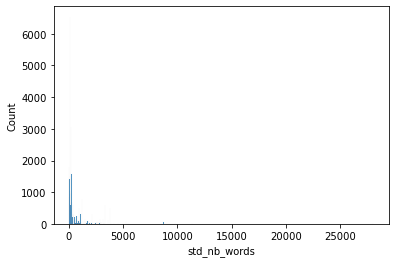

In [262]:

sns.histplot(x="std_nb_words",  data=df3)

In [244]:
dfgrps = df2.groupby(["From", "body_len"]).groups
keys = list(dfgrps.keys())
k = keys[0]
k[1]
keys_1 = [k for k in keys if k[1] == 1]

In [ ]:
keys_1

In [ ]:
dfg = df2.groupby(["From", "body_len"])

In [ ]:
for k in keys_1:
   print("==> ", dfg.get_group(k).body)

In [ ]:
df.From.to_csv("from.csv", index=0)

In [ ]:
body_list = eval(bodies[0])

In [ ]:
type(bodies[0])

---

In [ ]:
# Number of words. All words that don't relate to the email itself should be removed.
# We'll do that at a later stsage. 


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
words = [len([i for i in nlp(re.sub('</b>|<b>', '', i2)) if not (i.is_space or i.is_punct)]) for i2 in body]

In [ ]:
words = nlp(body)
body

In [ ]:
nb_words = len(words)
nb_chars = len(body)
nb_words, nb_chars

We must remove punctuation, and special characters. Lookint at the list below, perhaps remove phone numbers, any numbers, hyphens? 
I can also create my own parser? 
Read about [Spacy](https://spacy.io/usage/spacy-101#features).

In [ ]:
words

In [ ]:
for w in words:
    print(w)

In [ ]:
for ent in words.ents:
    print(ent, ",,", ent.text, ent.start_char, ent.end_char, ent.label_)